![alt text](https://drive.google.com/uc?export=view&id=1DXUVHxd4t15mfuqMgMCLnsP4jWVI5EWz)
<br>
© Copyright The University of New South Wales - CRICOS 00098G

# Laboratory 2, Part A:
# Diabetes Hospitalisations - Data Preparation: Data exploration and Manipulation









![alt text](https://drive.google.com/uc?export=view&id=105SGqeyo8RgLhSO8mN7ZE5OsG0YiLPKt)



---





---



# 1. Introduction: Machine Learning and Data Mining Work-Flow

#### Step 1. Research question:

We should always keep in mind the final goal (referred to as the 'question' or step 1 in our machine learning workflow) of the machine learning problem we are trying to solve. In real life, we are interested not just in accurate predictions but in using these predictions as part of a larger decision-making process.

In this set of exercises, our final goal is to build a predictive algorithm to forecast hospital readmission within 30 days after discharge. The prediction will be made just before discharge.

The data managers of the 130 hospitals that comprise this dataset are interested in answering this question to implement an intervention (a discharge plan) if readmission is highly probable.



---



####  Step 2. Data: Do we have the data to answer this research question?

We have identified a set of variables that might be relevant to predicting readmission. This will be our first attempt to solve this problem by testing different algorithms. We will start by using a linear model in the next couple of weeks, followed by trees (simple trees, random forest, and gradient boosted trees) in subsequent weeks.

We will present our conclusions to the board of managers after having used all these algorithms. This will be part of the assignment—Project 1. More instructions to come soon.



---



####  Step 3. Data Gathering:

We assume that we have obtained approval from ethics committees, consulted with the IT teams of the 130 hospitals, and devised a method to extract, transfer, and store the data securely for our research.




---



####  Step 4. Exploratory Data Analysis -  Data Exploration and Manipulation ( Preprocessing)

The fourth step is the visualization and exploration of our data. We did part of this analysis in Chapter 1. In this exercise, we are going to explore our features in more detail and prepare our dataset for future analysis.

Bear in mind that there is not a single way to carry out data preprocessing. As a health data scientist, you must make decisions based on the specific problem and data.



---



## 1.1 Data Exploration and Manipulation: Preprocessing

During the data cleaning process, the training and test sets can be kept combined to maintain consistency, or they must be separated to avoid leaking information from the test set into the training set.

For example, when encoding a categorical variable, the same levels of categories must be coded equally in both training and test sets. Therefore, we can keep the whole dataset without partitioning it initially. This is the case for this first exercise.

However, we must distinguish when to carry out data manipulation with both sets combined and when to split the dataset into training and test sets. For instance, splitting is necessary when performing imputation for missing values. If the feature 'age' has some missing values, we might decide to impute these with the median age. Note that the median age must be calculated from the training set! We will then impute the values in both the training and test sets using the median age value from the training set. Remember, the test set simulates the future, so no information from the test set should be leaked into the training set.




---



## 1.2 Aims of the Exercise:
 1. To manipulate our data to be in the right format for the predictive model that we selected.
 2. To select input variables.
 3. To continue becoming familiar with the diabetes inpatient hospital dataset and the clinical terms contained in it.

 This exercise aligns with the next course learning outcomes:

3. Apply machine learning workflow to health data problems.

## 1.3 Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.

## 1.4 Tips
1. Run all the cells in sequence (one at a time), using the "Run" button.
2. To edit this notebook, just double-click  each cell. Choose between "Code"  or "Text" ( "Markdown" cell) using the buttons above.

Follow the instructions given and if you have any questions, please use the **Comments section** in **Open Learning**.



---





---



# 2. Docstring:

All programs should have an initial docstring comment. It must include at least the following elements:

* Purpose: what is the aim of your code?
* Date created
* Author
* Date modified
* Author of the modification
* Method: how did you go about solving the problem?
* Data dictionary: The data dictionary should contain all the important variables and constants defined, their datatype (float, string, int) and a short description of what they are.
* List and defintions of functions: similar to the data dictionary, but with functions.
* List of libraries: libraries used in the program and their functionality.

Is there anything else you think we should include in the docstring? Please comment in the comments section of this week's laboratory.

Please read these two documents:
1. pandas docstring guide: https://pandas.pydata.org/pandas-docs/version/0.23/contributing_docstring.html
2. Style guide: https://www.cse.unsw.edu.au/~en1811/resources/style.html


<b> Docstring:</b>
#####################################################################################################################

(double-click here to create doctstring)


#####################################################################################################################



---





---



# 3. Load the data and select only desired columns.

For this chapter, we will build a logistic regression model to predict readmission. This is a binary classification problem, meaning the target has only two outcomes: 'yes' and 'no'.

Now, we will load the hospital dataset and manipulate the features that need adjustments.

Some important points to keep in mind:

1. Machine learning algorithm: The decision of which algorithm to use will depend on several factors that we will learn about during the course. Here, we directly instruct you to use logistic regression because it is the classification algorithm we are focusing on in this lesson

2. Time of Prediction - Discharge: Since we are predicting readmission at discharge (the time the prediction is made), it is reasonable to assume that we can use all the data available for all features. When some data is given to us, we are tempted to assume that all the data is known at all times, and we can use all features for our predictive algorithm. However, this is often not the case. Let me explain. In our example, the data represents a hospital encounter or hospitalization. We do not have timestamps for when a medication has been changed or a lab test has been carried out. But we know that at discharge time, all this data is already in the electronic medical record. Therefore, we can use all this data if our time of prediction is discharge.

3. Time of Prediction - Halfway through the hospitalisation: However, if our time of prediction were halfway through the hospitalization, we would need to be more careful and ensure all the timestamps were available.

4. Time of Prediction - Admission: As another example, if we wanted to predict the length of stay (LOS), this is a value we would want to predict at the beginning of a patient’s stay. At the beginning of a patient’s stay, most lab tests wouldn't have been performed, and we wouldn't know values such as the number of procedures or surgeries performed. Hence, we couldn't reasonably use all the features of the dataset to predict the length of stay.



---



In [7]:
# Insert your comments and explanations

import sys
import numpy as np
import pandas as pd
import seaborn as sns
# We can also plot directly using pandas:
# https://pandas.pydata.org/docs/reference/plotting.html

In [ ]:
drive.mount(root, force_remount=True)

Mounted at /content/drive


In [8]:
# Insert your comments and explanations

# Mount Google Drive
# We do not need to run this cell if you are not running this notebook in Google Colab

if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


If you are running this notebook in Google Colab, you must define your project paths. In this case, define your `project_path`.

In [9]:
# Insert your comments and explanations

from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    # You may need to change 'MyDrive' to 'My Drive'.
    project_path = Path(root) / 'MyDrive' / 'Colab Notebooks'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()

In [40]:
# Insert your comments and explanations

# import pickle
pickle_data_path = Path(project_path) /'hospital.pickle'
hospital = pd.read_pickle(pickle_data_path)

In [41]:
# Insert your comments and explanations

# Sanity Check:
print(hospital.columns)
print(hospital.shape)

Index(['los', 'Age', 'sex', 'payer_code', 'medical_specialty', 'max_glu_serum',
       'A1Cresult', 'number_diagnoses', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_emergency', 'number_inpatient',
       'number_outpatient', 'group_name_1', 'group_name_2', 'group_name_3',
       'readmission', 'admission_type_id_cat', 'discharge_disposition_id_cat',
       'admission_source_id_cat'],
      dtype='object')
(69270, 21)




---





---



# 4. Grouping the features  'admission_type_id', 'discharge_disposition_id'and  'admission_source_id' .

We are going to group these variables as shown in the [data dictionary](https://drive.google.com/file/d/1nh80X5kBqHf8AxACFWpmqrVq9wiAETAj/view?usp=sharing).


First, each ID feature is duplicated and stored in the dataset under the same name, but ending with ‘grouped’ instead of ‘ID’. Then, we create a dictionary object containing the desired mappings from numeric IDs to word descriptions. Finally, we use the .map() function to associate the IDs with their descriptions and convert them to string data type.



---



## 4.1 Duplicating the columns

In [42]:
# Insert your comments and explanations

# Duplicating each of the desired columns
hospital['discharge_disposition_grouped'] = hospital['discharge_disposition_id_cat']
hospital['admission_source_grouped'] = hospital['admission_source_id_cat']
hospital['admission_type_grouped'] = hospital['admission_type_id_cat']



---



## 4.2 Admission_type_id

* Check [data dictionary](https://drive.google.com/file/d/1nh80X5kBqHf8AxACFWpmqrVq9wiAETAj/view?usp=sharing).

* Counts and visualization.

In [43]:
# Insert your comments and explanations


print(hospital.admission_type_id_cat.value_counts())

admission_type_id_cat
1    25933
3    24270
2    11769
5     4134
4     2868
7      279
6       17
Name: count, dtype: int64


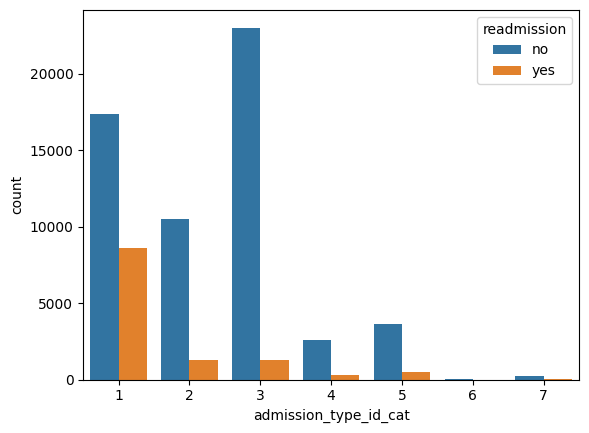

In [46]:
# Insert your comments and explanations

# Source: https://seaborn.pydata.org/generated/seaborn.countplot.html
ax = sns.countplot(x="admission_type_id_cat", hue="readmission", data=hospital)


**Using dictionary mapping for 'admission_type_grouped' (Source: data/diabetes/Data_Dictionary.pdf):**

In [44]:
# Insert your comments and explanations

# Mapping admission_type_id to admission_type_grouped
dict_map = ({1:'Emergency' ,
             2:'Urgent',
             3:'Elective',
             4:'Not Available/Null',
             5:'Not Available/Null',
             6:'Trauma Centre',
             7:'Not Available/Null'})
hospital['admission_type_grouped'] = hospital['admission_type_grouped'].map(dict_map)
hospital['admission_type_grouped'] = hospital['admission_type_grouped'].astype(str)

In [45]:
# Insert your comments and explanations

#Sanity Check
hospital['admission_type_grouped'].value_counts()

admission_type_grouped
Emergency             25933
Elective              24270
Urgent                11769
Not Available/Null     7281
Trauma Centre            17
Name: count, dtype: int64



---



discharge_disposition_id_cat
1     43689
3      8783
6      8276
18     2473
2      1534
22     1410
5       908
25      746
4       541
7       398
23      260
28       90
8        73
15       40
24       25
17        8
9         8
16        3
27        3
12        2
Name: count, dtype: int64
discharge_disposition_grouped
nan    69270
Name: count, dtype: int64


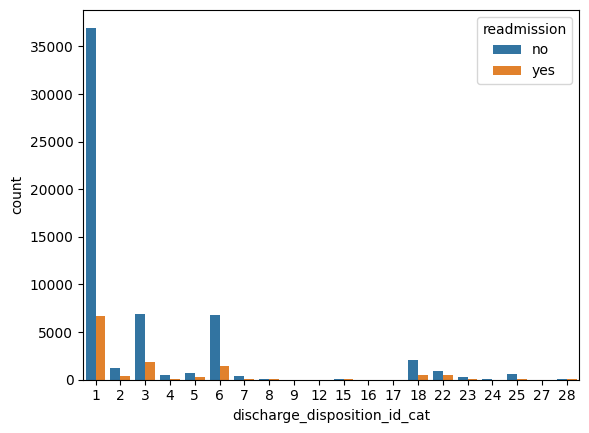

In [56]:
# My codes:
# Visualization of the original ID counts
print(hospital.discharge_disposition_id_cat.value_counts())
ax = sns.countplot(x="discharge_disposition_id_cat", hue="readmission", data=hospital)

# Define the mapping dictionary based on your data dictionary
discharge_map = {
    1: 'Home',
    2: 'Short term hospital',
    3: 'SNF',
    4: 'ICF',
    5: 'Inpatient care institution',
    # Add other mappings based on your data dictionary
}

# Apply the mapping
hospital['discharge_disposition_grouped'] = hospital['discharge_disposition_grouped'].map(discharge_map)
hospital['discharge_disposition_grouped'] = hospital['discharge_disposition_grouped'].astype(str)

# Sanity check
print(hospital['discharge_disposition_grouped'].value_counts())


## 4.3 Discharge_disposition_id

* Check [data dictionary](https://drive.google.com/file/d/1nh80X5kBqHf8AxACFWpmqrVq9wiAETAj/view?usp=sharing).

* Counts and visualization.

In [47]:
# Insert your comments and explanations

print(hospital.discharge_disposition_id_cat.value_counts(sort=False))

discharge_disposition_id_cat
1     43689
2      1534
3      8783
4       541
5       908
6      8276
7       398
8        73
9         8
12        2
15       40
16        3
17        8
18     2473
22     1410
23      260
24       25
25      746
27        3
28       90
Name: count, dtype: int64


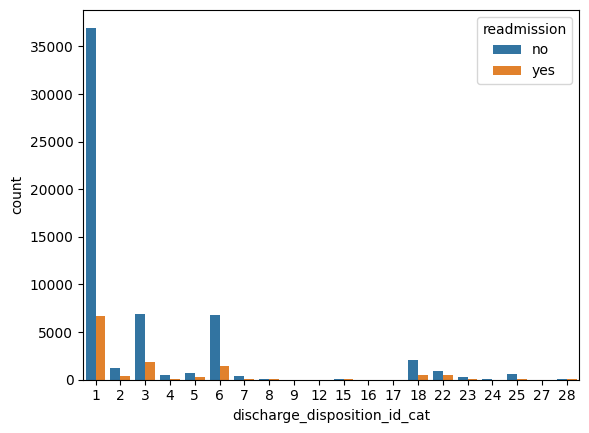

In [48]:

# Insert your comments and explanations

# Source: https://seaborn.pydata.org/generated/seaborn.countplot.html
ax = sns.countplot(x="discharge_disposition_id_cat", hue="readmission", data=hospital)


**Using dictionary mapping for 'discharge_disposition_grouped' (Source: data/diabetes/Data_Dictionary.pdf):**

In [49]:
# Insert your comments and explanations

# Mapping admission_source_id to discharge_disposition_grouped
dict_map = ({1: 'Discharged to home',
             2: 'Short term hospital',
             3: 'Transferred to SNF',
             4: 'Transferred to ICF',
             5: 'Short term hospital',
             6: 'Home health service',
             7: 'Left AMA',
             8: 'Home health service',
             9: 'Other',
             10: 'Other',
             12: 'Other',
             15: 'Other',
             16: 'Other',
             17: 'Other',
             18: 'Not available/Null',
             22: 'Short term hospital',
             23: 'Other',
             24: 'Other',
             25: 'Not available/Null',
             27: 'Other',
             28: 'Other'
             })
hospital['discharge_disposition_grouped'] = hospital['discharge_disposition_grouped'].map(dict_map)
hospital['discharge_disposition_grouped'] = hospital['discharge_disposition_grouped'].astype(str)

In [50]:
# Insert your comments and explanations

#Sanity Check
hospital['discharge_disposition_grouped'].value_counts()

discharge_disposition_grouped
Discharged to home     43689
Transferred to SNF      8783
Home health service     8349
Short term hospital     3852
Not available/Null      3219
Transferred to ICF       541
Other                    439
Left AMA                 398
Name: count, dtype: int64



---



## 4.3 Admission_source_id

* Check [data dictionary](https://drive.google.com/file/d/1nh80X5kBqHf8AxACFWpmqrVq9wiAETAj/view?usp=sharing).

* Counts and visualization.

In [51]:
# Insert your comments and explanations

print(hospital.admission_source_id_cat.value_counts())

admission_source_id_cat
7     44510
1     15826
11     4351
4      2014
6      1211
2       690
5       359
12      124
9        86
3        83
8         8
10        5
14        2
13        1
Name: count, dtype: int64


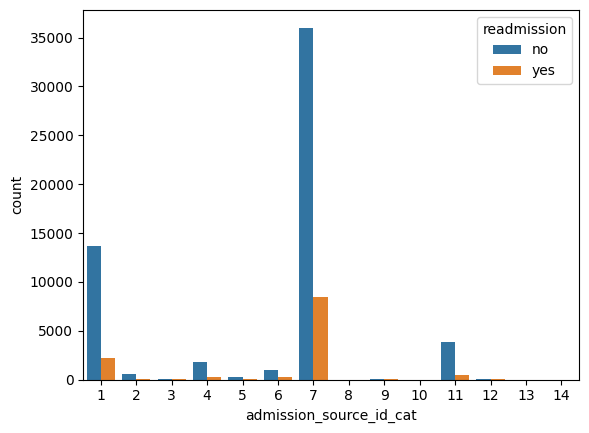

In [52]:
# Insert your comments and explanations

# Source: https://seaborn.pydata.org/generated/seaborn.countplot.html
ax = sns.countplot(x="admission_source_id_cat", hue="readmission", data=hospital)


**Using dictionary mapping for 'admission_source_grouped' (Source: data/diabetes/Data_Dictionary.pdf):**

In [53]:
# Insert your comments and explanations

dict_map = ({1: 'Physician Referral',
             2: 'Clinic Referral',
             4: 'Transfer from another health care facility',
             5: 'Transfer from SNF',
             6: 'Transfer from another health care facility',
             7: 'Emergency Room',
             9: 'Not available/Null',
             11: 'Not available/Null',
             12: 'Not available/Null',
             3: 'Other',
             8: 'Other',
             10: 'Other',
             13: 'Other',
             14: 'Other'})
hospital['admission_source_grouped'] = hospital['admission_source_grouped'].map(dict_map)
hospital['admission_source_grouped'] = hospital['admission_source_grouped'].astype(str)

In [54]:
# Insert your comments and explanations

#Sanity Check
hospital['admission_source_grouped'].value_counts()

admission_source_grouped
Emergency Room                                44510
Physician Referral                            15826
Not available/Null                             4561
Transfer from another health care facility     3225
Clinic Referral                                 690
Transfer from SNF                               359
Other                                            99
Name: count, dtype: int64



---





---



## 4.4 Delete 'ID' features

In [27]:
# Insert your comments and explanations

# Drop continuous variables for grouped variables
hospital = hospital.drop(['discharge_disposition_id_cat','admission_source_id_cat','admission_type_id_cat'], axis = 1)

In [28]:
# Insert your comments and explanations

hospital.columns

Index(['los', 'Age', 'sex', 'payer_code', 'medical_specialty', 'max_glu_serum',
       'A1Cresult', 'number_diagnoses', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_emergency', 'number_inpatient',
       'number_outpatient', 'group_name_1', 'group_name_2', 'group_name_3',
       'readmission', 'discharge_disposition_grouped',
       'admission_source_grouped', 'admission_type_grouped'],
      dtype='object')



---





---



# 5. Categorical data


## 5.1 Checking the levels of categorical variables with missing information.

We should check that each categorical column contains only the expected values and that no misspellings have occurred. This is an important step when dealing with categorical variables, as it can prevent many unexpected errors and results during analysis.

We can visualize sections of missing data ('?') or 'None' labels in the variables 'weight', 'payer_code', 'medical_specialty', 'max_glu_serum', and 'A1Cresult'. Additionally, we identified missing values in the 'sex' variable. Therefore, we will decide whether to keep or delete the missing values by analyzing the number of records in these categories. We will check these variables in detail here, but make sure you check all the others.

I removed the variable 'weight' in the previous Notebook, so



In [29]:
# Insert your comments and explanations

print(hospital.sex.value_counts())

sex
Female             36841
Male               32426
Unknown/Invalid        3
Name: count, dtype: int64


In [30]:
# Insert your comments and explanations

print(hospital.payer_code.value_counts())

payer_code
?     29912
MC    19782
HM     3958
BC     3359
SP     3276
MD     2112
CP     1916
UN     1839
CM     1292
OG      645
PO      455
DM      364
WC      117
CH      111
OT       62
SI       37
MP       32
FR        1
Name: count, dtype: int64


In [31]:
# Insert your comments and explanations

print(hospital.medical_specialty.value_counts())

medical_specialty
?                         33422
InternalMedicine          10607
Family/GeneralPractice     4955
Emergency/Trauma           4370
Cardiology                 4206
                          ...  
Speech                        1
SportsMedicine                1
Dermatology                   1
Perinatology                  1
Neurophysiology               1
Name: count, Length: 63, dtype: int64


In [32]:
# Insert your comments and explanations

print(hospital.max_glu_serum.value_counts())

max_glu_serum
None    65941
Norm     1697
>200      932
>300      700
Name: count, dtype: int64


In [33]:
# Insert your comments and explanations

print(hospital.A1Cresult.value_counts())

A1Cresult
None    56785
>8       5936
Norm     3697
>7       2852
Name: count, dtype: int64


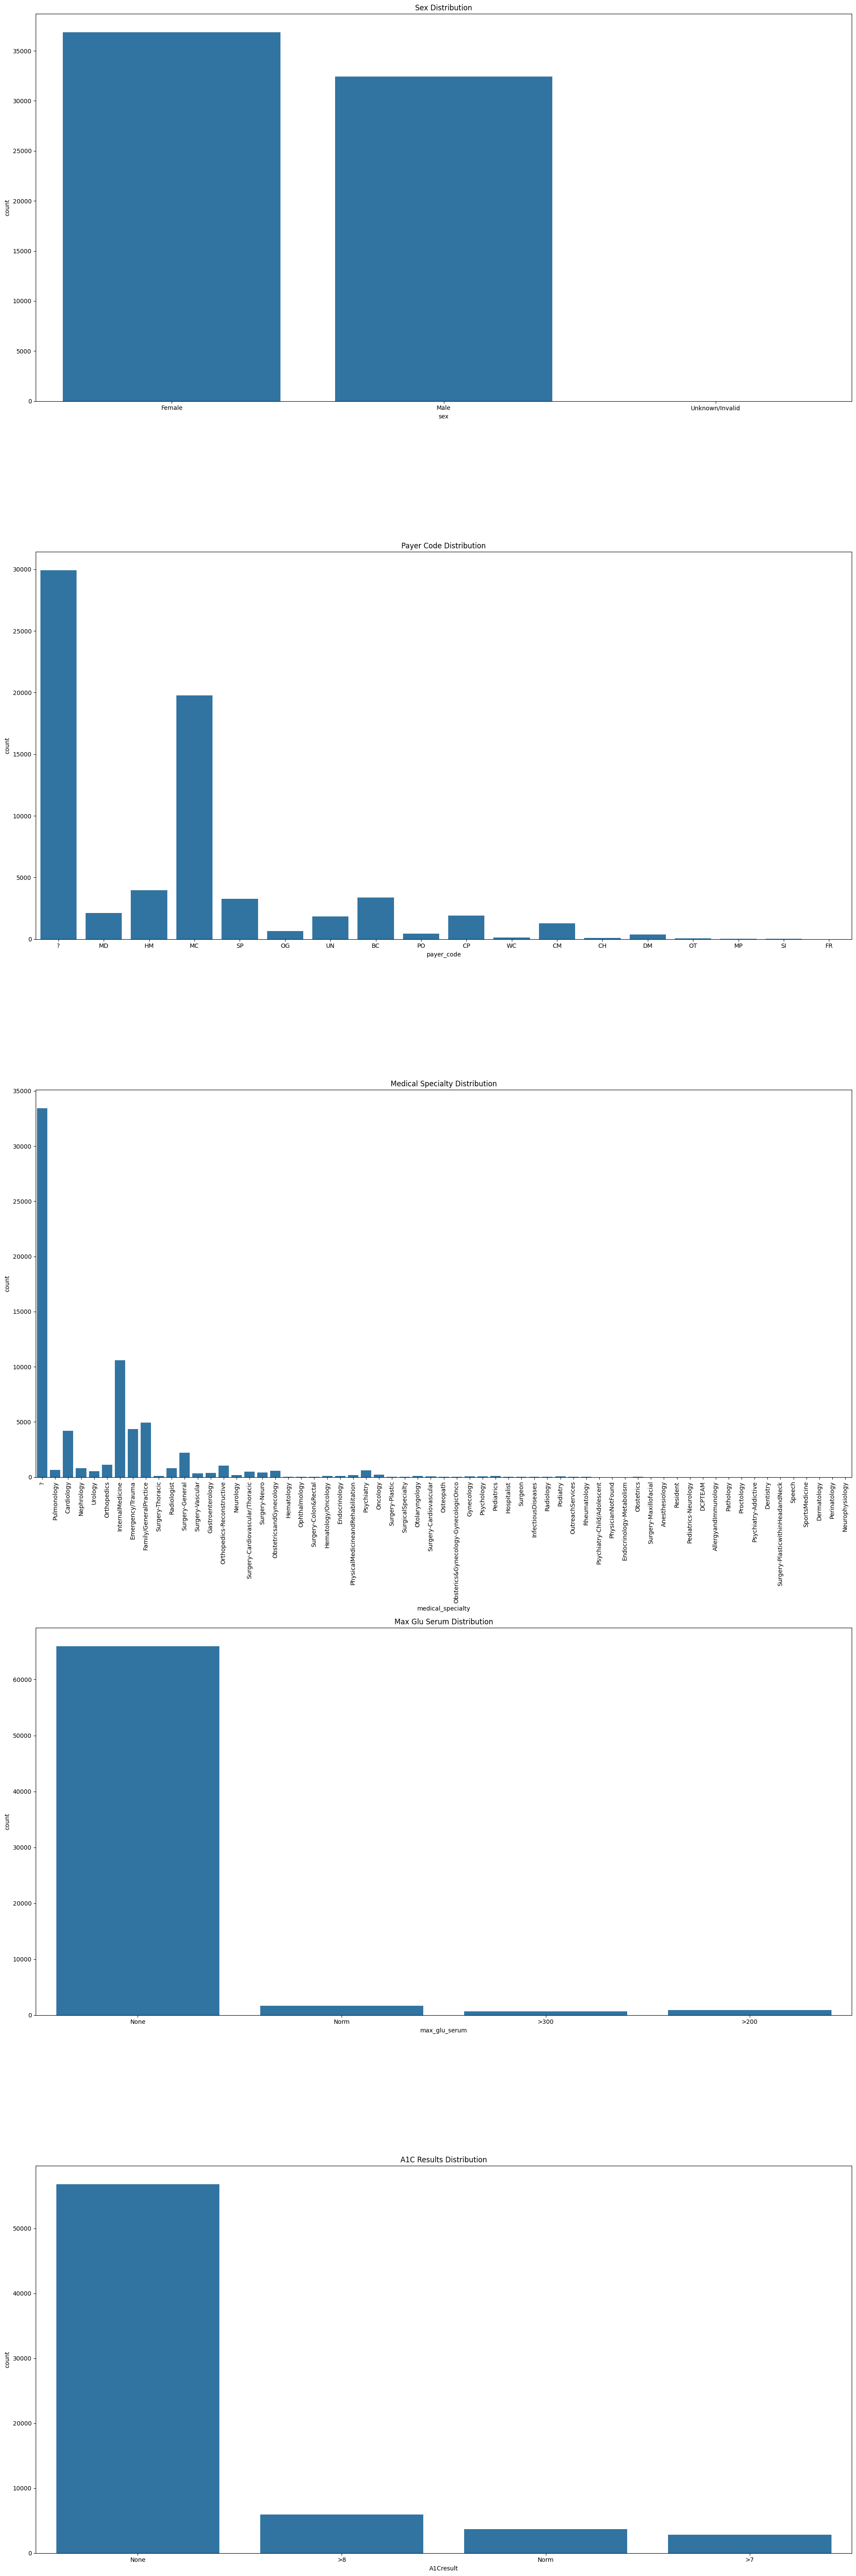

In [64]:
# Visualizing Missing Data

import seaborn as sns
import matplotlib.pyplot as plt

# Quick visualization of missing data in several key variables, including A1Cresult
fig, axs = plt.subplots(nrows=5, figsize=(20, 60))  # Adjust the number of columns to 5

sns.countplot(x='sex', data=hospital, ax=axs[0])
axs[0].set_title('Sex Distribution')

sns.countplot(x='payer_code', data=hospital, ax=axs[1])
axs[1].set_title('Payer Code Distribution')

sns.countplot(x='medical_specialty', data=hospital, ax=axs[2])
axs[2].set_title('Medical Specialty Distribution')
axs[2].tick_params(axis='x', rotation=90)

sns.countplot(x='max_glu_serum', data=hospital, ax=axs[3])
axs[3].set_title('Max Glu Serum Distribution')

sns.countplot(x='A1Cresult', data=hospital, ax=axs[4])
axs[4].set_title('A1C Results Distribution')

plt.tight_layout()
plt.show()



**Decisions**

1. We notice that the Unknown/Invalid category in the 'sex' variable has only 3 records. This is a very small sample size compared to the total number of records (~70,000). Thus, any pattern in readmission discovered based on the sex being Unknown/Invalid would most likely be due to chance. Hence, we decide to delete these records.
2. Most records have missing values for 'weight'. Therefore, we will remove this variable from our dataset.
3. Most records have missing values for 'payer_code'. Therefore, we will remove this variable from our dataset.
4. Most records have missing values for 'medical_specialty'. Therefore, we will remove this variable from our dataset.
5. We decided to keep 'max_glu_serum' and 'A1Cresult' despite the high number of 'None' labels. We can discuss this further in class if needed.

In [65]:
# Insert your comments and explanations

# Deleting category Unknown/Invalid from sex variable
hospital = hospital[hospital.sex != 'Unknown/Invalid']
#Sanity Check
print(hospital.sex.value_counts())

sex
Female    36841
Male      32426
Name: count, dtype: int64


In [66]:
# Insert your comments and explanations

# Drop weight, payer_code and medical_specialty
hospital = hospital.drop(['payer_code','medical_specialty'],axis=1)

## 5.2 One hot encoding.
Now that we have the data in an appropriate form, we are ready to one-hot-encode our categorical variables.

In [36]:
# Insert your comments and explanations

# Checking the nature of the new grouped variables variables
hospital.dtypes

los                               int64
Age                               int64
sex                              object
max_glu_serum                    object
A1Cresult                        object
number_diagnoses                  int64
num_lab_procedures                int64
num_procedures                    int64
num_medications                   int64
number_emergency                  int64
number_inpatient                  int64
number_outpatient                 int64
group_name_1                     object
group_name_2                     object
group_name_3                     object
readmission                      object
discharge_disposition_grouped    object
admission_source_grouped         object
admission_type_grouped           object
dtype: object

Explanation and Further Steps
1. Selecting Categorical Variables: You've identified the categorical variables including both the original and the newly grouped variables. The pd.get_dummies() function is used here to convert these categorical variables into a format that can be easily used by machine learning algorithms.

2. Execution: The function pd.get_dummies() creates new columns, named after the unique entries in the original columns prefixed by the original column name. It then assigns binary values (0s and 1s) corresponding to the presence of each categorical feature.

3. Dropping Columns: Based on your decision, dropping columns like 'weight' (already removed in a previous step), 'payer_code', and 'medical_specialty' is intended to streamline the dataset by removing features with high levels of missing data which could potentially distort your model’s performance.

4. Sanity Check: After encoding and removing columns, it’s good practice to check the new dataframe structure to ensure all transformations have been carried out as expected.

Additional Considerations
1. Sparse Features: One-hot encoding can significantly increase the dimensionality of your dataset (a situation known as the "curse of dimensionality"). If you find that performance is being impacted, you might consider other techniques like feature hashing or embeddings for high-cardinality categorical features.
2. Model Complexity: As you add more features through encoding, consider the complexity and the computational cost of your model. You may need to balance between the number of features and the model's interpretability and performance.
3. Feature Scaling: Since you're likely to use logistic regression, make sure that numerical features are scaled appropriately because differences in scale might cause the model to bias towards certain features.
After these steps, your dataset will be ready for further analysis, model training, and validation. If further issues or needs arise during model training, you might revisit preprocessing steps like encoding to optimize performance.







In [67]:
import pandas as pd

# Perform one-hot encoding on categorical variables
categorical_vars = ['sex', 'max_glu_serum', 'A1Cresult', 'discharge_disposition_grouped',
                    'admission_source_grouped', 'admission_type_grouped']

# pd.get_dummies() automatically selects only object-type columns if not specified
hospital_encoded = pd.get_dummies(hospital, columns=categorical_vars)

# Print new columns to verify
print("New columns after one-hot encoding:")
print(hospital_encoded.columns)


New columns after one-hot encoding:
Index(['los', 'Age', 'number_diagnoses', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_emergency',
       'number_inpatient', 'number_outpatient', 'group_name_1', 'group_name_2',
       'group_name_3', 'readmission', 'admission_type_id_cat',
       'discharge_disposition_id_cat', 'admission_source_id_cat', 'sex_Female',
       'sex_Male', 'max_glu_serum_>200', 'max_glu_serum_>300',
       'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>7',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm',
       'discharge_disposition_grouped_nan',
       'admission_source_grouped_Clinic Referral',
       'admission_source_grouped_Emergency Room',
       'admission_source_grouped_Not available/Null',
       'admission_source_grouped_Other',
       'admission_source_grouped_Physician Referral',
       'admission_source_grouped_Transfer from SNF',
       'admission_source_grouped_Transfer from another health care facility',


### <font color='blue'>Question: Write below the code to create one-hot encode our variables</font>
<p><font color='green'>Tip: Remember, we do not want to one-hot-encode the response, 'readmission'. You may want to use pandas.DataFrame.drop('column name', axis = 1), to choose all but the specified columns.


In [68]:
# Write solution here
import pandas as pd

# Assuming 'hospital' is your DataFrame containing all the data including the response variable 'readmission'

# Select all columns for one-hot encoding except the response variable 'readmission'
categorical_vars = hospital.drop('readmission', axis=1).select_dtypes(include=['object']).columns

# Perform one-hot encoding on the selected categorical variables
hospital_encoded = pd.get_dummies(hospital, columns=categorical_vars)

# Print the new DataFrame structure to verify changes
print("Data types after one-hot encoding:")
print(hospital_encoded.dtypes)


Data types after one-hot encoding:
los                                          int64
Age                                          int64
number_diagnoses                             int64
num_lab_procedures                           int64
num_procedures                               int64
                                             ...  
admission_type_grouped_Elective               bool
admission_type_grouped_Emergency              bool
admission_type_grouped_Not Available/Null     bool
admission_type_grouped_Trauma Centre          bool
admission_type_grouped_Urgent                 bool
Length: 66, dtype: object


## 5.3 Saving our new cleaned dataset with dummy variables using 'pickle'.

For this we will use 'pickle'. Pickle is used to store python objects (lists, dictionaries, dataframes) in a file that we can call or load after. In our case, we will store our dataset in pickle and load it in the following exercises of this an other Chapters.

First, we will open a file that we will call 'hospital_data.pickle'. Then, we will use pickle.dump() to put the dataset into the opened file, then close. More information: https://docs.python.org/3/library/pickle.html


In [69]:
# Insert your comments and explanations

# Saving the new dataset as hospital_final in the Google Drive.

pickle_data_path_final = Path(project_path) /'hospital_final.pickle'

hospital.to_pickle(pickle_data_path_final)

In [ ]:
# Insert your comments and explanations

# Alternative code using pickle library instead of pandas
#import pickle
#pickle_data_path_final_alt = Path(project_path) /'hospital_final_alt.pickle'

#with open(pickle_data_path_final_alt, 'wb') as output:
#    pickle.dump(hospital, output)